In [2]:
!pip install yfinance arch matplotlib pandas


C:\Users\Ricky\AppData\Local\Temp\ipykernel_19464\3208459016.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2018-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


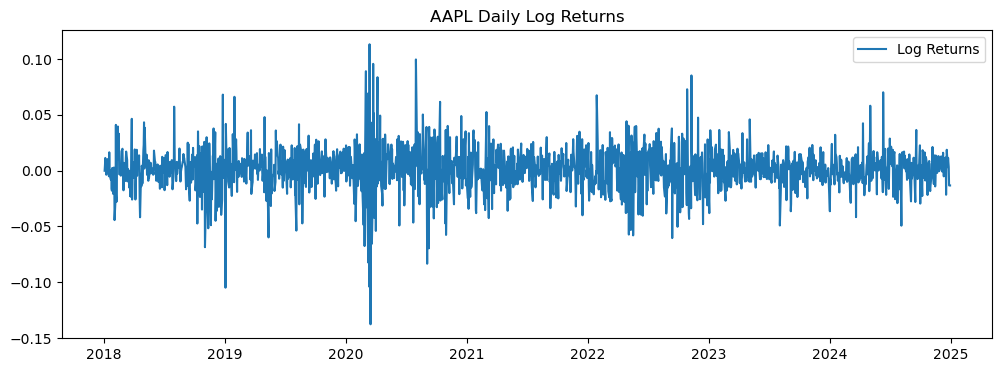

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data (auto_adjust=True by default now)
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2024-12-31')

# Use 'Close' instead of 'Adj Close'
data['LogReturn'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

# Plot log returns
plt.figure(figsize=(12, 4))
plt.plot(data['LogReturn'], label="Log Returns")
plt.title(f"{ticker} Daily Log Returns")
plt.legend()
plt.show()


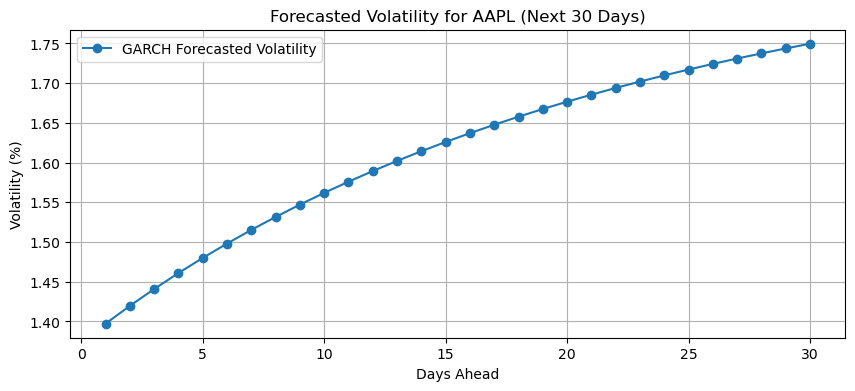

In [11]:
# Forecast next 30 days
forecast = garch_fit.forecast(horizon=30)
predicted_vol = forecast.variance.values[-1, :]
days = list(range(1, 31))

plt.figure(figsize=(10, 4))
plt.plot(days, predicted_vol**0.5, marker='o', label="GARCH Forecasted Volatility")
plt.title(f"Forecasted Volatility for {ticker} (Next 30 Days)")
plt.xlabel("Days Ahead")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True)
plt.show()


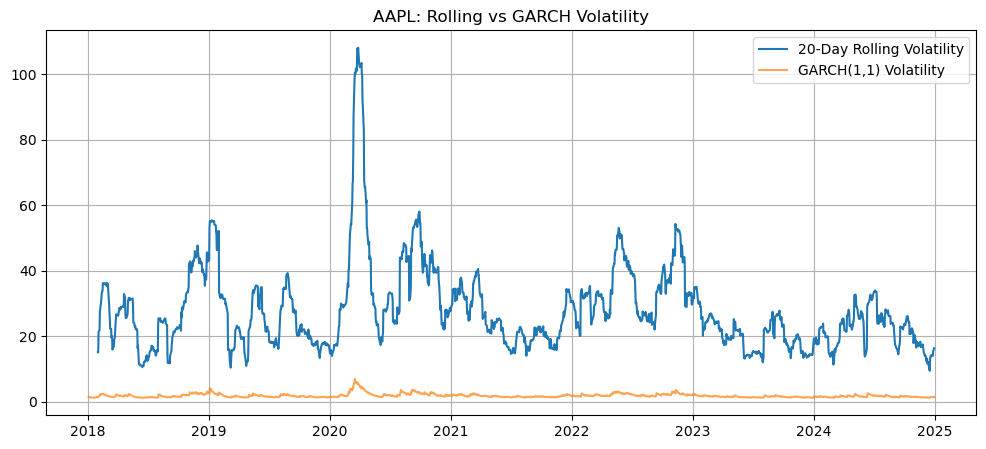

In [12]:
data['RollingVol20'] = data['LogReturn'].rolling(window=20).std() * (252**0.5) * 100  # Annualized

# Get conditional volatility from GARCH model
data['GARCH_vol'] = garch_fit.conditional_volatility

plt.figure(figsize=(12, 5))
plt.plot(data['RollingVol20'], label='20-Day Rolling Volatility')
plt.plot(data['GARCH_vol'], label='GARCH(1,1) Volatility', alpha=0.7)
plt.title(f"{ticker}: Rolling vs GARCH Volatility")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
data[['RollingVol20', 'GARCH_vol']].to_csv(f"{ticker}_volatility_comparison.csv")
